In [1]:
import pandas as pd

In [2]:
pd.DataFrame({'yes':['a','b'],'no':['c','d']})

,yes,no
0,a,c
1,b,d


In [3]:
pd.Series([30,40,50])

0    30
1    40
2    50
dtype: int64

In [4]:
df=pd.read_csv("Data_Train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape

(10683, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [11]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [12]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [13]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day

In [14]:
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df['Journey_Hour'] = df['Dep_Time'].dt.hour

In [17]:
df['Journey_Minute'] = df['Dep_Time'].dt.minute

In [18]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

In [19]:
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [20]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

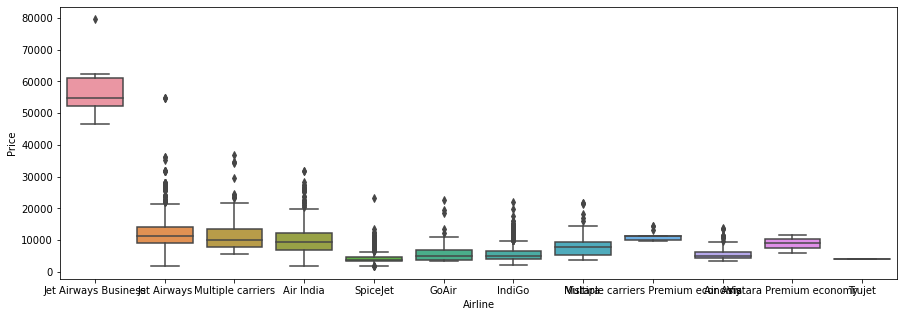

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

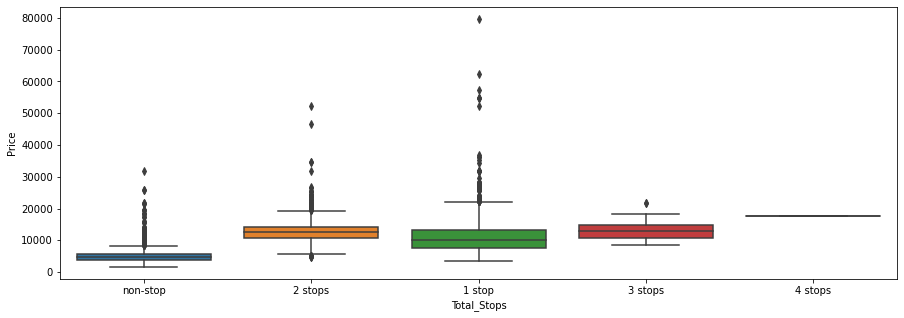

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df)

In [26]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<Figure size 1080x360 with 0 Axes>

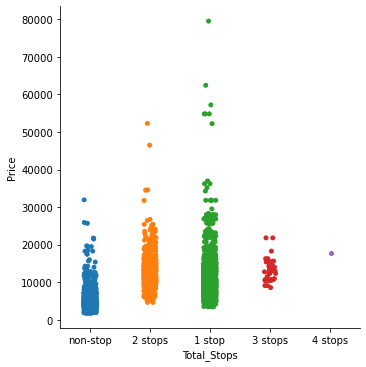

In [27]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Total_Stops',data=df)

In [28]:
Source= pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
Destination= pd.get_dummies(df['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
df.drop('Additional_Info',axis=1,inplace=True)

In [34]:

df['Route_5']=df['Route'].str.split('?').str[0]
df['Route_1']=df['Route'].str.split('?').str[0]
df['Route_2']=df['Route'].str.split('?').str[0]
df['Route_3']=df['Route'].str.split('?').str[0]
df['Route_4']=df['Route'].str.split('?').str[0]


In [35]:
df['Route_1']=df['Route'].str.split('?').str[0]
df['Route_2']=df['Route'].str.split('?').str[1]
df['Route_3']=df['Route'].str.split('?').str[2]
df['Route_4']=df['Route'].str.split('?').str[3]
df['Route_5']=df['Route'].str.split('?').str[4]

In [36]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder=LabelEncoder()

In [39]:
for i in['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i]=encoder.fit_transform(df[i])

In [40]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_5,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,5,0,13,29,13
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,5,2,25,1,3
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,6,9,9,25,4,25,5,3,32,4,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,5,2,34,3,13
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,5,0,34,8,13


In [41]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
dic={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [43]:
df['Total_Stops']=df['Total_Stops'].map(dic)

In [48]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [51]:
df['Duration']=duration

In [52]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_5,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,5,0,13,29,13
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,5,2,25,1,3
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h 0m,2,13882,6,9,9,25,4,25,5,3,32,4,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1,6218,5,12,18,5,23,30,5,2,34,3,13
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1,13302,3,1,16,50,21,35,5,0,34,8,13


In [ ]:
'2h 50m'.split(' ')

In [ ]:
'2h 50m'.split(' ')[0]

In [ ]:
'2h 50m'.split(' ')[0][0:-1]

In [ ]:
'2h 50m'.split(' ')[0][0:1]

In [ ]:
'2h 50m'.split(' ')[1][0:1]

In [ ]:
'2h 50m'.split(' ')[0][0:-1]

In [ ]:
'2h 50m'.split(' ')[0:-1]

In [ ]:
'2h 50m'.split(' ')[1][0:-1]

In [53]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [54]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)


In [55]:
df.drop('Duration',axis=1,inplace=True)

In [56]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Total_Stops                int64
Price                      int64
Journey_Day                int64
Journey_Month              int64
Journey_Hour               int64
Journey_Minute             int64
Arrival_Hour               int64
Arrival_Minute             int64
Route_5                    int32
Route_1                    int32
Route_2                    int32
Route_3                    int32
Route_4                    int32
Duration_hours            object
Duration_mins             object
dtype: object

In [57]:
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)

In [58]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,...,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_5,Route_1,Route_2,Route_3,Route_4,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,...,20,1,10,5,0,13,29,13,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,...,50,13,15,5,2,25,1,3,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,...,25,4,25,5,3,32,4,5,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,...,5,23,30,5,2,34,3,13,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,...,50,21,35,5,0,34,8,13,4,45


In [59]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)

In [60]:
df.dtypes

Total_Stops       int64
Price             int64
Journey_Day       int64
Journey_Month     int64
Journey_Hour      int64
Journey_Minute    int64
Arrival_Hour      int64
Arrival_Minute    int64
Route_5           int32
Route_1           int32
Route_2           int32
Route_3           int32
Route_4           int32
Duration_hours    int32
Duration_mins     int32
dtype: object

In [62]:
df = pd.concat([df,Source,Airline,Destination],axis=1)

In [63]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_5,Route_1,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,5,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,5,2,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,5,3,...,0,0,0,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,2,...,0,0,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,5,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Hour',
       'Journey_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Route_5',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Duration_hours',
       'Duration_mins', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [65]:
x=df.drop('Price',axis=1)

In [66]:
y=df['Price']

In [67]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x,y)

array([2.17429445, 1.07578059, 0.85137172, 1.43173599, 1.19478141,
       1.84722021, 1.5338529 , 0.74655344, 2.07386233, 2.81415497,
       2.26673626, 1.43455675, 1.78101962, 1.08388171, 0.17326447,
       1.53517938, 0.88919868, 0.29013496, 0.77386423, 0.10537589,
       0.674317  , 0.91357852, 0.        , 0.57641782, 0.        ,
       0.33103659, 0.01952466, 0.22352124, 0.        , 1.51752853,
       0.42362495, 0.29049261, 0.18068485, 0.3970164 , 0.15752638,
       1.54444378, 0.8581933 , 0.29057115, 0.75120227, 0.09071817,
       0.67787543, 0.91884851, 0.        , 0.5745267 , 0.00524003,
       0.32809291, 0.        , 0.22020608, 0.        , 1.56407546,
       0.41095961, 0.27508685, 0.1596447 , 0.36963078])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
from sklearn import metrics
import numpy as np

In [72]:
def model(algo):
    my_model = algo.fit(x_train,y_train)
    print('train_score:',my_model.score(x_train,y_train))
    y_pred=my_model.predict(x_test)
    r2_score=metrics.r2_score(y_test,y_pred)
    print('r2_score:',r2_score)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    print('mean absolute error:',mae)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE:',rmse)


In [73]:
def model(algo):
    my_model = algo.fit(x_train,y_train)
    print('train_score:',my_model.score(x_train,y_train))
    y_pred=my_model.predict(x_test)
    r2_score=metrics.r2_score(y_test,y_pred)
    print('r2_score:',r2_score)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    print('mean absolute error:',mae)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE:',rmse)
    sns.distplot(y_test-y_pred)

In [74]:
from sklearn.linear_model import LinearRegression

train_score: 0.6363823617309448
r2_score: 0.5961703521961814
mean absolute error: 1973.864289741727
RMSE: 3005.8433359154724


C:\Users\jntuacep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


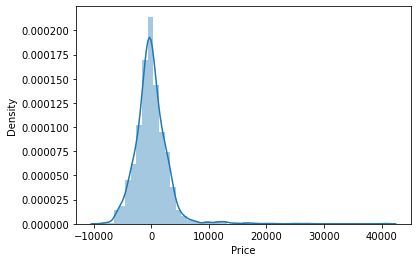

In [75]:
model(LinearRegression())

In [76]:
from sklearn.tree import DecisionTreeRegressor

train_score: 0.9697753035424316
r2_score: 0.5935721363877916
mean absolute error: 1431.1547184526592
RMSE: 3015.4975403192593


C:\Users\jntuacep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


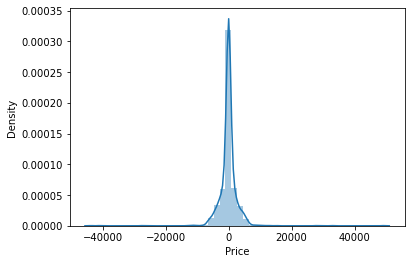

In [77]:
model(DecisionTreeRegressor())

In [79]:
from sklearn.tree import RandomForestRegressor

ImportError: cannot import name 'RandomForestRegressor' from 'sklearn.tree' (C:\Users\jntuacep\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [80]:
from sklearn.ensemble import RandomForestRegressor

NameError: name 'RandomForestRegression' is not defined

train_score: 0.9565216965142906
r2_score: 0.7649351053106535
mean absolute error: 1203.1972983240048
RMSE: 2293.3013617250654


C:\Users\jntuacep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


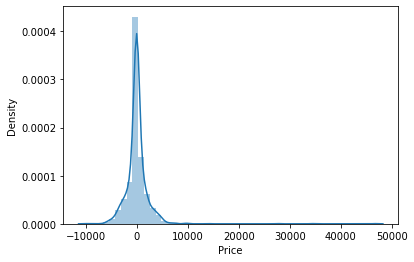

In [82]:
model(RandomForestRegressor())